In [17]:
!pip install gensim


In [18]:
import gensim

import gensim.downloader

Part 1: Word Embeddings

In [19]:
# Load pre-trained Word2Vec model trained on wikipedia data

model = gensim.downloader.load("glove-wiki-gigaword-100")
# Getting the vector for a word

dog = model['dog']

# Getting the most similar words

print(model.most_similar('dog'))

# Getting the similarity between two words

print(model.similarity('dog', 'cat'))


[('cat', 0.8798074126243591), ('dogs', 0.8344309329986572), ('pet', 0.7449564337730408), ('puppy', 0.7236376404762268), ('horse', 0.7109653949737549), ('animal', 0.6817063093185425), ('pig', 0.655417263507843), ('boy', 0.6545307636260986), ('cats', 0.6471933126449585), ('rabbit', 0.6468630433082581)]
0.87980753


Part 1a

In [20]:

#find the most similar words to a word of your choice. 
#Does the result make sense? Look up some of the words if you don't know them
#Share and discuss with your group
print(model.most_similar('computer'))

[('computers', 0.8751983046531677), ('software', 0.8373122215270996), ('technology', 0.7642159461975098), ('pc', 0.7366448640823364), ('hardware', 0.7290390729904175), ('internet', 0.72867751121521), ('desktop', 0.7234442830085754), ('electronic', 0.7221828699111938), ('systems', 0.7197922468185425), ('computing', 0.7141730785369873)]


In [21]:

#we can extract a "capital vector" by subtracting the vector for a country from the vector for its capital
capital= model["berlin"]-model['germany']

fra_capital=model["france"]+capital

print(model.most_similar(fra_capital))
#likewise, we can extract a "plural vector" by subtracting the vector for a singular noun from the vector for its plural
plural=model["cats"]-model["cat"]

print(model.most_similar(plural))

#we can also add vectors together
plural_dogs=model["dog"]+plural

print(model.most_similar(plural_dogs))



[('paris', 0.8827143311500549), ('france', 0.755802571773529), ('french', 0.7075165510177612), ('prohertrib', 0.6943174600601196), ('berlin', 0.6665561199188232), ('brussels', 0.6574430465698242), ('lyon', 0.6526200771331787), ('london', 0.64079749584198), ('le', 0.6403627991676331), ('strasbourg', 0.6346526145935059)]
[('lowlanders', 0.4844588041305542), ('zebras', 0.45914992690086365), ('dicots', 0.45332765579223633), ('non-arabs', 0.45208773016929626), ('amerindians', 0.4478238821029663), ('buffalos', 0.4475123882293701), ('giraffes', 0.4466330111026764), ('bavarians', 0.4452260732650757), ('welshmen', 0.4440663158893585), ('dingos', 0.44403281807899475)]
[('dogs', 0.8921768665313721), ('cats', 0.8814380764961243), ('dog', 0.7873795628547668), ('animals', 0.7512702345848083), ('pets', 0.7392118573188782), ('cows', 0.6835324168205261), ('pet', 0.679297685623169), ('horses', 0.6774964332580566), ('pigs', 0.6755765080451965), ('animal', 0.6683686971664429)]


In [22]:
# this can be used to find examples of data bias in word embeddings

# for example, we can find the most similar words to "doctor" and "nurse"

gender=model["woman"]-model["man"]

print(model.most_similar(gender))
print(model.most_similar(-gender))

model.most_similar(model["doctor"]+gender)



[('menstruating', 0.6102039813995361), ('miscarry', 0.5550354719161987), ('lactating', 0.542172908782959), ('pre-eclampsia', 0.5129693746566772), ('uterus', 0.5093088746070862), ('ovulating', 0.5070309042930603), ('miscarried', 0.5043483376502991), ('adoptee', 0.5012543201446533), ('comnena', 0.5012539625167847), ('pulecio', 0.500389039516449)]
[('arsene', 0.4388486444950104), ('ancelotti', 0.42151397466659546), ('nistelrooy', 0.41140034794807434), ('strachan', 0.4089668393135071), ('rafa', 0.40728434920310974), ('technicals', 0.4060872495174408), ('allardyce', 0.4018688201904297), ('boss', 0.40107354521751404), ('rangers', 0.39962300658226013), ('utd', 0.3967454135417938)]


[('doctor', 0.8661209940910339),
 ('nurse', 0.7757077813148499),
 ('physician', 0.7128061652183533),
 ('woman', 0.7089030742645264),
 ('doctors', 0.6793617010116577),
 ('pregnant', 0.6787967085838318),
 ('patient', 0.6772218346595764),
 ('dentist', 0.6694242358207703),
 ('mother', 0.6586815714836121),
 ('medical', 0.6466937065124512)]

Part 1b

In [46]:
#try to isolate a specific dimension in the embeddings and add it to multiple words. 
#does this show any bias or assumptions in the data? 
# Discuss with your group and share most interesting dimension in the document
gender_dim = model['woman'] - model['man']

# Add the gender dimension to neutral words
words = ['doctor', 'nurse', 'teacher', 'engineer', 'scientist']
for word in words:
    if word in model:
        result = model.most_similar(model[word] + gender_dim, topn=5)
        print(f"Word: {word} + gender dimension →")
        for similar_word, score in result:
            print(f"   {similar_word} ({score:.3f})")
        print()


Word: doctor + gender dimension →
   doctor (0.866)
   nurse (0.776)
   physician (0.713)
   woman (0.709)
   doctors (0.679)

Word: nurse + gender dimension →
   nurse (0.899)
   nurses (0.689)
   pregnant (0.689)
   nursing (0.676)
   midwife (0.664)

Word: teacher + gender dimension →
   teacher (0.880)
   student (0.720)
   schoolteacher (0.675)
   nurse (0.672)
   graduate (0.658)

Word: engineer + gender dimension →
   engineer (0.839)
   technician (0.659)
   educator (0.615)
   surgeon (0.596)
   contractor (0.583)

Word: scientist + gender dimension →
   scientist (0.846)
   researcher (0.772)
   anthropologist (0.678)
   sociologist (0.660)
   psychologist (0.657)



 The addition of gender to neutral profession words resulted in words that were more associated with females. This  shows that the embedding contains gender bias and reflects societal assumptions about gender roles.

Part 2: Visualization and Embeddings in Space

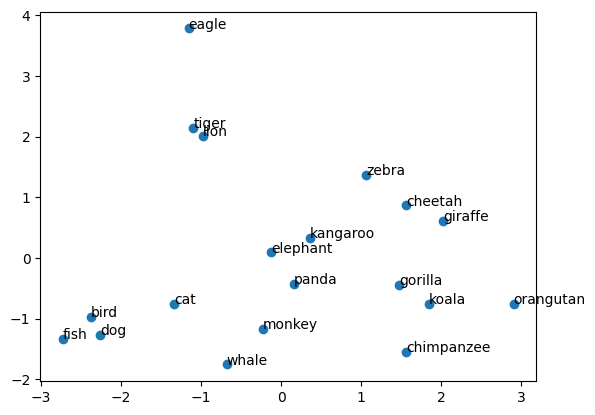

In [24]:
#visualize pca of word embeddings

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

words=["dog","cat","fish", "whale", "bird", "eagle", "lion", "tiger", "cheetah", "elephant", "giraffe", "zebra", "kangaroo", "koala", "panda", "monkey", "gorilla", "chimpanzee", "orangutan", ]

X=[model[word] for word in words]

#identify clusters of words in the word embeddings at high dimensions

pca=PCA(n_components=2)

X_pca=pca.fit_transform(X)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (X_pca[i,0],X_pca[i,1]))

plt.show()

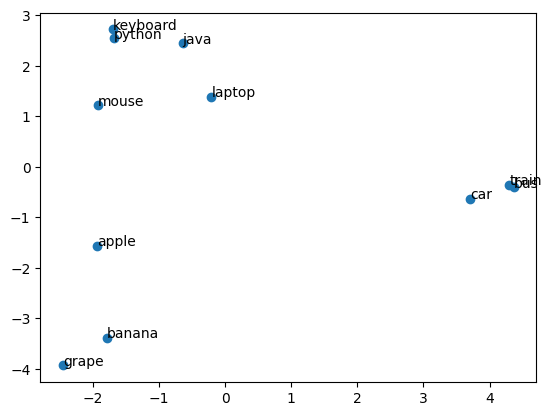

In [25]:
#repeat this process with your own set of 10-20 words. 
#Does the proximity between words and overall distances make sense? Work as a group and discuss your individual findings.
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


my_words = ["apple", "banana", "grape", "car", "bus", "train", "python", "java", "laptop", "keyboard", "mouse"]

X = [model[word] for word in my_words if word in model]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:, 0], X_pca[:, 1])

for i, word in enumerate(my_words):
    if word in model:
        plt.annotate(word, (X_pca[i, 0], X_pca[i, 1]))

plt.show()



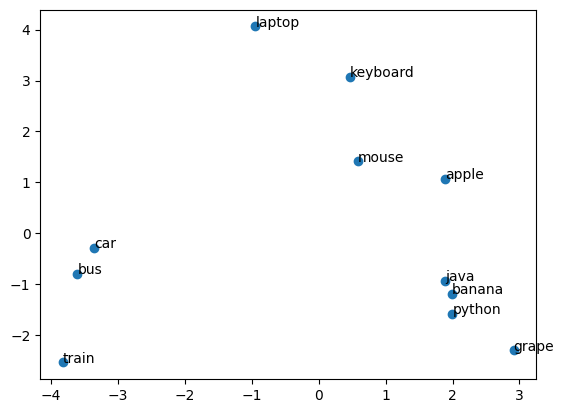

In [26]:
# repeat the process with a different pre-trained model and the same set of words. 
# What has changed in the embedding space? What might this have to do with the training data?
twitter_model= gensim.downloader.load("glove-twitter-100")
twitter_model = gensim.downloader.load("glove-twitter-100")

X_twitter = [twitter_model[word] for word in my_words if word in twitter_model]

pca = PCA(n_components=2)
X_pca_twitter = pca.fit_transform(X_twitter)

plt.scatter(X_pca_twitter[:, 0], X_pca_twitter[:, 1])

for i, word in enumerate(my_words):
    if word in twitter_model:
        plt.annotate(word, (X_pca_twitter[i, 0], X_pca_twitter[i, 1]))

plt.show()

Part 3: Embedding reddit posts

In [33]:
#read in uiuc csv
import pandas as pd
uiuc=pd.read_csv("uiuc.csv")
mich=pd.read_csv("umich.csv")

#sample so we have even number of samples from each dataset
mich=mich.sample(n=4725)

#assign labels based on origin subreddit of comment
uiuc['label']=1
mich['label']=0

#you will be working with the data csv for the rest of the question
data=pd.concat([uiuc,mich])
data



,Unnamed: 0,date,post_votes,text,user,com_votes,label
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2,1
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2,1
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2,1
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1,1
...,...,...,...,...,...,...,...
359,359,2024-09-02 19:44:05,55,"yeah, we were just chilling and studying but a...",Juliana_cui,58,0
7973,7973,2024-07-08 14:25:37,2,"In that case I would say look into what ""sells...",RunningEncyclopedia,1,0
4322,4322,2024-08-11 16:18:07,27,this comment section makes me realize how unse...,madelainaur,1,0
1889,1889,2024-08-27 17:58:35,19,this is spreading misinformation. bats have en...,Emergency_Peanut_252,4,0


In [34]:
#using the code from project 1, clean the text and create a bag of words representation of the text
from sklearn.feature_extraction.text import CountVectorizer

def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c.isalpha() or c.isspace()])
    return text

data['cleaned_text'] = data['text'].apply(clean_text)

vectorizer = CountVectorizer(stop_words='english')
X_bow = vectorizer.fit_transform(data['cleaned_text'])

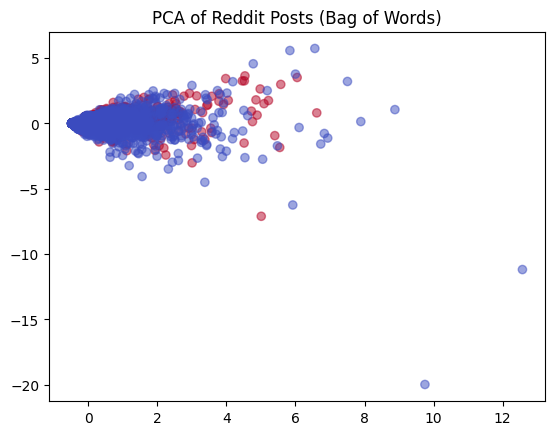

In [35]:
#using the embedding code from last week, plot a pca of all posts in the subreddits data set

#color by the "label" column to see if the two subreddits are separable in the embedding space

# is there a clear separation between the two columns? 

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_bow.toarray())

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['label'], cmap='coolwarm', alpha=0.5)
plt.title("PCA of Reddit Posts (Bag of Words)")
plt.show()

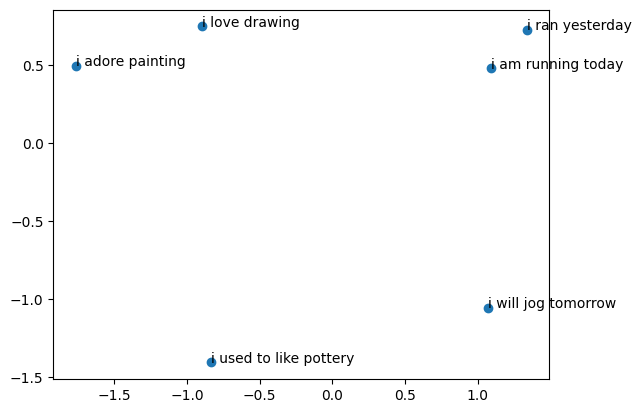

In [36]:
#here is a function to calculate the average embedding of a cleaned document
import numpy as np
#we can sum together all the embeddings to get a representation of all the concepts expressed in the document
def avg_embedding(sentence, model):
    words=sentence.split()
    embeddings=[model[word] for word in words if word in model]
    return np.mean(embeddings, axis=0)

sentences=["i am running today", "i will jog tomorrow", "i ran yesterday", "i love drawing", "i adore painting", "i used to like pottery"]

#we can then calculate the average embedding of each sentence

avg_embeddings=[avg_embedding(sentence, model) for sentence in sentences]

#remove nan values
avg_embeddings=[embedding for embedding in avg_embeddings if not np.isnan(embedding).any()]
#we can then plot the pca of these embeddings

pca=PCA(n_components=2)

X_pca=pca.fit_transform(avg_embeddings)

plt.scatter(X_pca[:,0],X_pca[:,1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (X_pca[i,0],X_pca[i,1]))

plt.show()

/opt/anaconda3/envs/is310/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/anaconda3/envs/is310/lib/python3.9/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


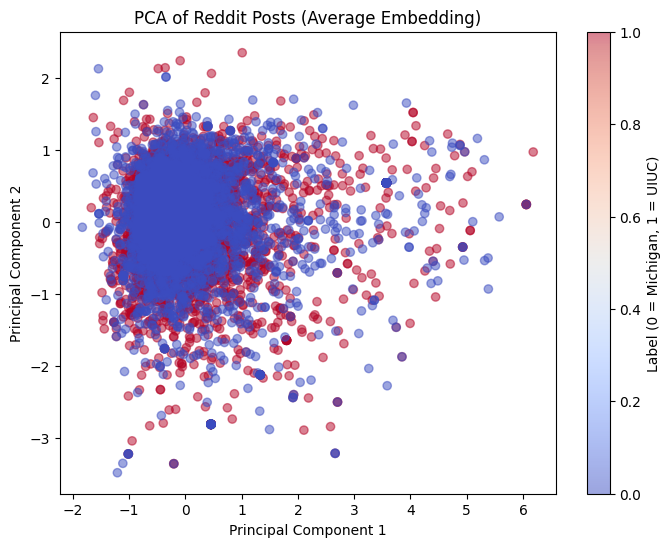

In [38]:

#use this function to calculate the average embedding of each post in the dataset

#plot the pca of the average embeddings, color by the "label" column

#how is this plot different from the previous one?

#is there clear separation? 

data['avg_embed'] = data['cleaned_text'].apply(lambda x: avg_embedding(x, model))

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

valid_data = data[data['avg_embed'].apply(lambda x: x is not None and not np.isnan(x).any())]

embeddings = np.vstack(valid_data['avg_embed'].values)
labels = valid_data['label'].values

pca = PCA(n_components=2)
X_pca = pca.fit_transform(embeddings)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='coolwarm', alpha=0.5)
plt.title("PCA of Reddit Posts (Average Embedding)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Label (0 = Michigan, 1 = UIUC)')
plt.show()

Part 4: HuggingFace and BERT

In [39]:
!pip install transformers

In [40]:
#Please wait until after next week to start

# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")


emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0
Device set to use mps:0


In [41]:
#use the pipeline to classify the sentiment of a sentence of your choice
pipe("I love this class")

[{'label': 'POS', 'score': 0.9923704862594604}]

In [42]:
#use the pipeline to classify the sentiment of all posts in the reddit dataset
#report the most common sentiment label
data['sentiment'] = data['text'].apply(lambda x: pipe(x)[0]['label'])

print(data['sentiment'].value_counts())

Token indices sequence length is longer than the specified maximum sequence length for this model (302 > 128). Running this sequence through the model will result in indexing errors


sentiment
NEU    5061
NEG    2361
POS    2028
Name: count, dtype: int64


In [44]:
#look at ten sample posts and labels; do you agree with all of them? 
sample = data[['text', 'sentiment']].sample(10)
for index, row in sample.iterrows():
    print(f"Post: {row['text']}\nPredicted Sentiment: {row['sentiment']}\n")

Post: Join some clubs that line up with your interests and meet people that way. I’d suggest doing one club that’s kind of just for fun/revolving around a hobby you like to do and one that’s more professional/revolves around an academic area you’re interested in. You’ll meet a ton of cool people that way.
Predicted Sentiment: POS

Post: Don’t be discouraged. My freshman year in the fall of 91 I had already known a few people form the summer program I was in down at U of I but most of them made their own connections. I had a few friends from high school there (I was in state) but I hardly connected with them the entire 4.5 years I was there. I made friends that I’m still cool with today because I was always around and went to stuff I enjoyed and did stuff I was into and I fostered those connections. Search yourself to find what you’re into and what you enjoy or what you want to discover in life. Then pursue that with fervor. Be yourself and people with similar interests will gravitate t

In [45]:
#is the UIUC or Michigan subreddit more negative?
uiuc_negative = data[(data['label'] == 1) & (data['sentiment'] == 'NEG')].shape[0]
mich_negative = data[(data['label'] == 0) & (data['sentiment'] == 'NEG')].shape[0]

print(f"UIUC negative posts: {uiuc_negative}")
print(f"Michigan negative posts: {mich_negative}")

UIUC negative posts: 1150
Michigan negative posts: 1211
